In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
target = 'quality'

features = ['Alkohol','Kyselina_jablčná','popoloviny','zásaditosť',
          'Horčík','Fenoly','Flavanoidy',
          'Nonflavanoid_phenols','Proantokyanidín',
          'Intenzita_farby','Odtieň','OD280_OD315',
          'Prolín']

columns = [target] + features

X = pd.read_csv('wine.data', names=columns, sep=',', header=None)
X.head()

,quality,Alkohol,Kyselina_jablčná,popoloviny,zásaditosť,Horčík,Fenoly,Flavanoidy,Nonflavanoid_phenols,Proantokyanidín,Intenzita_farby,Odtieň,OD280_OD315,Prolín
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
X.describe()

,quality,Alkohol,Kyselina_jablčná,popoloviny,zásaditosť,Horčík,Fenoly,Flavanoidy,Nonflavanoid_phenols,Proantokyanidín,Intenzita_farby,Odtieň,OD280_OD315,Prolín
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Vizualizácia dát

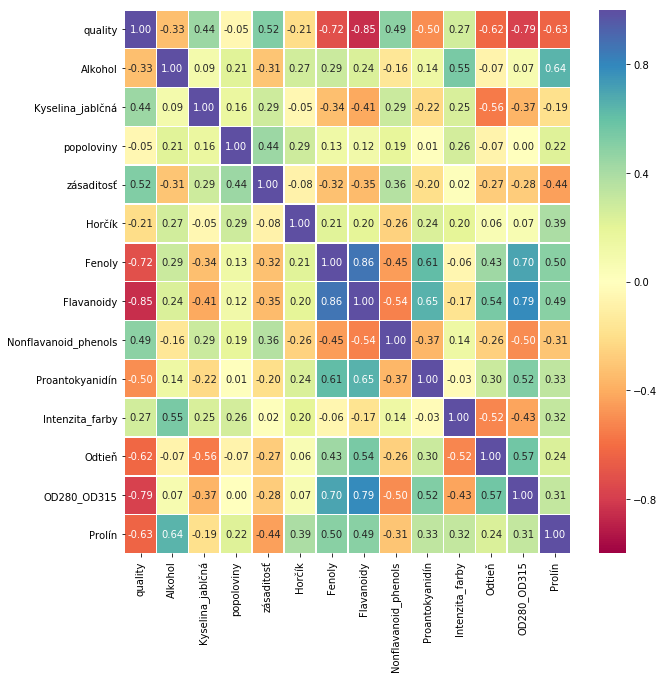

In [3]:
#korelačná mapa
import matplotlib.pyplot as plt
X.corr() 
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(X.corr(), vmin=-1, vmax=1, cmap='Spectral', annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.show()

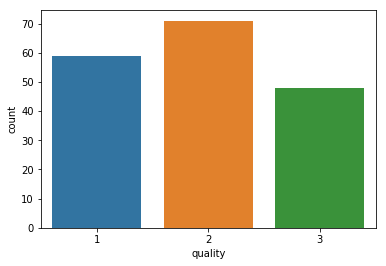

In [4]:
%matplotlib inline
import seaborn as sns
sns.countplot(x='quality',data=X)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


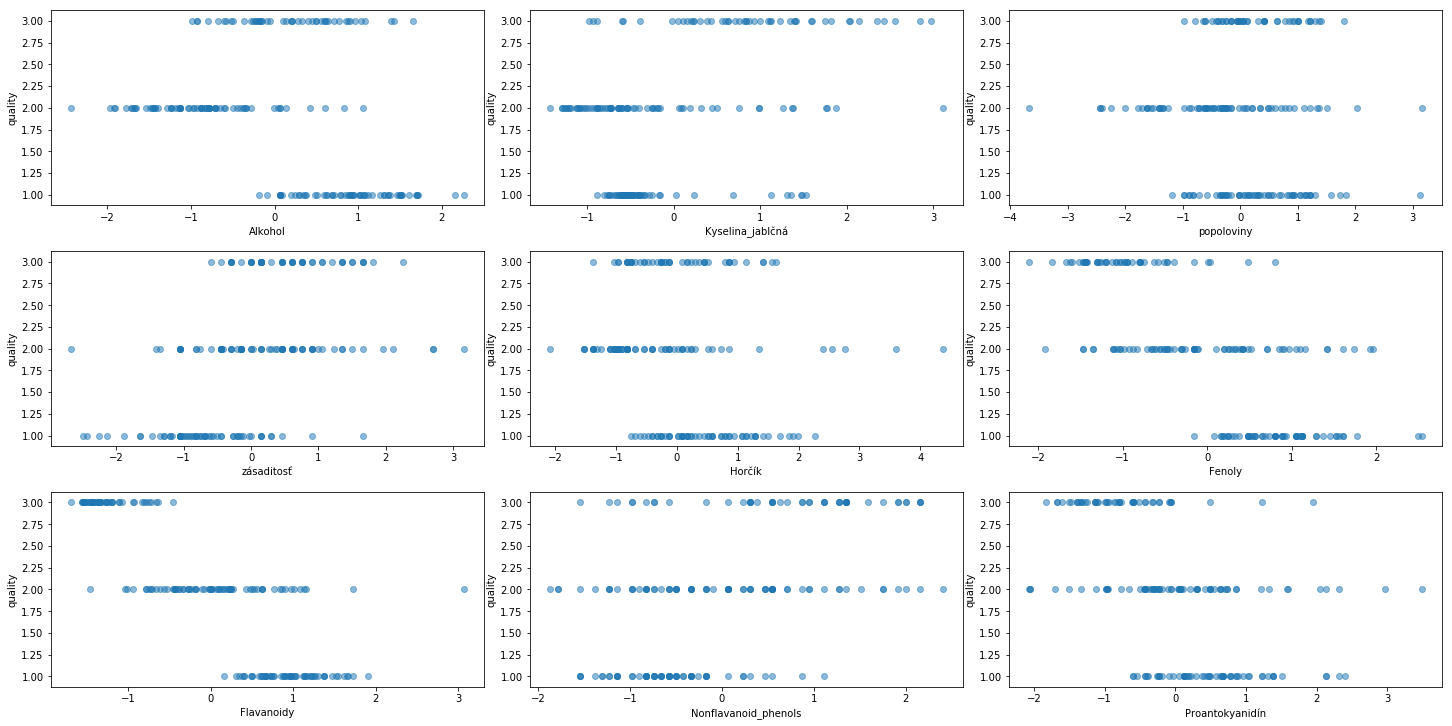

In [5]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# rozdelenie zdrojových a cielových premenných
Y = X['quality'].copy()
X = X.drop('quality',axis=1)


# štandardizácia zdrojových premenných
scaler = StandardScaler()
scaler = scaler.fit(X)
X[:] = scaler.transform(X)

'''
m_scaler = MinMaxScaler(feature_range=(0, ))
m_scaler = m_scaler.fit(X)
X[:] = m_scaler.transform(X)
'''

# grafy s rôznou veľkosťou osí
rows = 3 ; cols = 3
f, ax = plt.subplots(rows, cols, figsize=(20,10))

for _row in range(rows):
    for _col in range(cols):
        col_name = X.columns[(_row*cols) + _col]
        ax[_row, _col].scatter(X[col_name], Y, alpha=0.5)
        ax[_row, _col].set_xlabel(col_name)
        ax[_row, _col].set_ylabel('quality')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

# Rozdelenie dát

In [6]:
#vytvorenie fiktívnych premenných pre kategorické prvky
Y = pd.get_dummies(Y)
Y.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [7]:
from sklearn.model_selection import train_test_split

np.random.seed(127)

# rozdelenie datasetu na dva trenovacie a dva testovacie sety
X_train, X_test, y_train, y_test = train_test_split(X.values, Y.values, test_size=0.2, random_state=13)

print ("Shape of (X_train, X_test, y_train, y_test)")
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shape of (X_train, X_test, y_train, y_test)
(142, 13) (36, 13) (142, 3) (36, 3)


In [8]:
# definovanie počtu atribútov
n_features = X_train.shape[1]
n_classes = y_train.shape[1]

# počet vzoriek v každej sade údajov
n_train = X_train.shape[0]
n_test = X_test.shape[0]

# definovanie množstva neuronov
n_layer_in = n_features  # 11 neuronov vo vstupnej vrstve
n_layer_h1 = 50          # prvá skrytá vrstva
n_layer_h2 = 50          # druhá skrytá vrstva
n_layer_out = n_classes  # 7 neuronov vo výstupnej vrstve

sigma_init = 0.01   # náhodná inicializácia

In [9]:
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.utils import to_categorical


model = Sequential()
model.add(Dense(n_layer_h1, activation='relu', input_shape=(n_features,)))
model.add(Dense(n_layer_h2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(optimizer='adam', loss = 'binary_crossentropy',
       metrics=['accuracy'])

history =model.fit(X_train, y_train,batch_size=100, epochs=100, validation_split=0.5)
model.evaluate(X_test, y_test)

Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 71 samples, validate on 71 samples
Epoch 1/100
71/71 [==============================] - 0s 3ms/step - loss: 0.6075 - accuracy: 0.6714 - val_loss: 0.6146 - val_accuracy: 0.6479
Epoch 2/100
71/71 [==============================] - 0s 62us/step - loss: 0.5921 - accuracy: 0.6948 - val_loss: 0.5975 - val_accuracy: 0.6620
Epoch 3/100
71/71 [==============================] - 0s 67us/step - loss: 0.5750 - accuracy: 0.7136 - val_loss: 0.5800 - val_accuracy: 0.6854
Epoch 4/100
71/71 [==============================] - 0s 138us/step - loss: 0.5580 - accuracy: 0.7136 - val_loss: 0.5627 - val_accuracy: 0.6901
Epoch 5/100
71/71 [==============================] - 0s 127us/step - loss: 0.5414 - accuracy: 0.7230 - val_loss: 0.5459 - val_accuracy: 0.6948
Epoch 6/100
71/71 [==============================] - 0s 149us/step - loss: 0.5254 - accuracy: 0.7277 - val_loss: 0.5296 - val_accuracy: 0.7089
Epoch 7/

Epoch 56/100
71/71 [==============================] - 0s 100us/step - loss: 0.0717 - accuracy: 1.0000 - val_loss: 0.0820 - val_accuracy: 0.9906
Epoch 57/100
71/71 [==============================] - 0s 134us/step - loss: 0.0685 - accuracy: 1.0000 - val_loss: 0.0791 - val_accuracy: 0.9906
Epoch 58/100
71/71 [==============================] - 0s 76us/step - loss: 0.0655 - accuracy: 1.0000 - val_loss: 0.0764 - val_accuracy: 0.9906
Epoch 59/100
71/71 [==============================] - 0s 75us/step - loss: 0.0626 - accuracy: 1.0000 - val_loss: 0.0738 - val_accuracy: 0.9906
Epoch 60/100
71/71 [==============================] - 0s 55us/step - loss: 0.0599 - accuracy: 1.0000 - val_loss: 0.0714 - val_accuracy: 0.9906
Epoch 61/100
71/71 [==============================] - 0s 158us/step - loss: 0.0574 - accuracy: 1.0000 - val_loss: 0.0691 - val_accuracy: 0.9906
Epoch 62/100
71/71 [==============================] - 0s 64us/step - loss: 0.0549 - accuracy: 1.0000 - val_loss: 0.0669 - val_accuracy: 0.9

[0.03631929147781597, 0.9907407760620117]

In [10]:
y_pred = model.predict(X_test)

pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))


In [11]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)

print("Presnosť trénovania: %.2f%% / Validácia trénovania presnosti: %.2f%% / Strata trénovania: %.2f%% / Validácia straty %.2f%% "  %
      (a*100, 100*history.history['val_accuracy'][-1], 100*history.history['loss'][-1], 100*history.history['val_loss'][-1]))

Presnosť trénovania: 97.22% / Validácia trénovania presnosti: 99.06% / Strata trénovania: 1.41% / Validácia straty 3.15% 


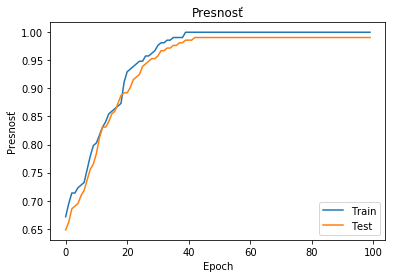

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Presnosť')
plt.ylabel('Presnosť')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

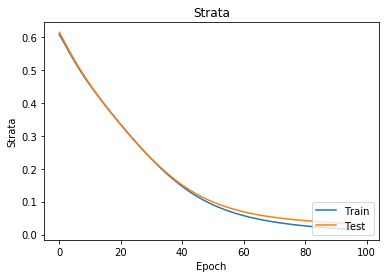

In [13]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Strata') 
plt.ylabel('Strata') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='lower right') 
plt.show()